<a href="https://colab.research.google.com/github/TSZJHLR/Cognitive-Computing-and-Applications/blob/main/NLP/cca_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Exercise: Implementing NLP Techniques with IMDb Movie Reviews


*   Objective: To develop a basic NLP system that processes unstructured text data from IMDb movie reviews, extracts useful insights, and applies context to resolve ambiguity.




## Dataset Loading:

1.   Download the IMDb Movie Reviews Dataset from Kaggle.
2.   Load the dataset using Python and display the first 10 rows of movie reviews and their corresponding sentiment labels (positive or negative).

### import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### import pandas

In [ ]:
import pandas as pd

### load dataset to dataframe

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/iims/sem6/cognitive computing applications/practicals/IMDB_Dataset.csv')

### display dataframe

In [ ]:
display(df1)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9994,"First off, this is the worst movie I've ever s...",negative
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative


### import nltk and download punkt () stopwords () wordnet ()

### remove punctuations

In [ ]:
import string

def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

df1['review'] = df1['review'].apply(lambda x: remove_punctuation(x))

### load first 10 rows

In [ ]:
display(df1.head(10))

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
5,Probably my alltime favorite movie a story of ...,positive
6,I sure would like to see a resurrection of a u...,positive
7,This show was an amazing fresh innovative ide...,negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


## Tokenization:


1.    Perform tokenization on the movie reviews. Write code to break each review into individual tokens (words).
2.    Output: Display the tokenized words for the first 3 reviews.




In [ ]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### function to tokenize

In [ ]:
def tokenize_text(text):
  tokens = nltk.word_tokenize(text)
  return tokens

### apply function to review

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Function to remove stop words from a string
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [w for w in tokens if not w.lower() in stop_words]
    return " ".join(filtered_tokens)

# Apply the remove_stopwords function to the 'review' column
df1['review'] = df1['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df1['tokens'] = df1['review'].apply(tokenize_text)
display(df1)

,review,sentiment,tokens
0,One reviewers mentioned watching 1 Oz episode ...,positive,"[One, reviewers, mentioned, watching, 1, Oz, e..."
1,wonderful little production br br filming tech...,positive,"[wonderful, little, production, br, br, filmin..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically theres family little boy Jake thinks...,negative,"[Basically, theres, family, little, boy, Jake,..."
4,Petter Matteis Love Time Money visually stunni...,positive,"[Petter, Matteis, Love, Time, Money, visually,..."
...,...,...,...
9994,First worst movie Ive ever seen may make want ...,negative,"[First, worst, movie, Ive, ever, seen, may, ma..."
9995,Fun entertaining movie WWII German spy Julie A...,positive,"[Fun, entertaining, movie, WWII, German, spy, ..."
9996,Give break anyone say good hockey movie know m...,negative,"[Give, break, anyone, say, good, hockey, movie..."
9997,movie bad movie watching endless series bad ho...,negative,"[movie, bad, movie, watching, endless, series,..."


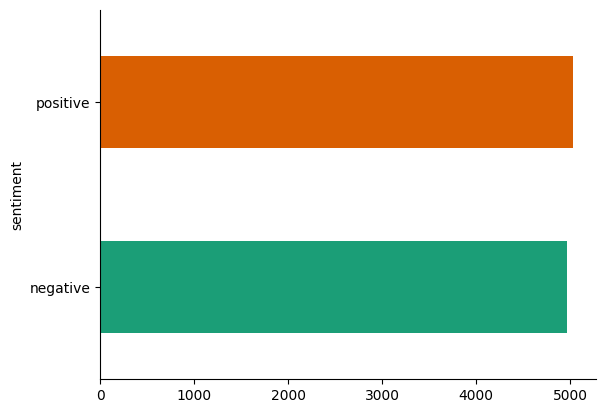

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### print first 3

In [ ]:
print(df1['tokens'].head(3))

0    [One, reviewers, mentioned, watching, 1, Oz, e...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
Name: tokens, dtype: object


## Part-of-Speech (POS) Tagging:

1.   Using an NLP library (e.g., NLTK or spaCy), perform POS tagging on the tokenized text to label each word according to its part of speech (e.g., noun, verb).
2.   Output: Show the POS tags for the first 3 reviews.

### import pos tag download averaged pereptron tagger ()

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.tag import PerceptronTagger
tagger = PerceptronTagger()

### function for pos tag on token

In [ ]:
def pos_tag_tokens(tokens):
  pos_tags_nltk = pos_tag(tokens)
  return pos_tags_nltk

### apply functions to tokens

In [ ]:
df1['pos_tags_nltk'] = df1['tokens'].apply(pos_tag_tokens)
display(df1)

,review,sentiment,tokens,pos_tags_nltk
0,One reviewers mentioned watching 1 Oz episode ...,positive,"[One, reviewers, mentioned, watching, 1, Oz, e...","[(One, CD), (reviewers, NNS), (mentioned, VBD)..."
1,wonderful little production br br filming tech...,positive,"[wonderful, little, production, br, br, filmin...","[(wonderful, JJ), (little, JJ), (production, N..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (..."
3,Basically theres family little boy Jake thinks...,negative,"[Basically, theres, family, little, boy, Jake,...","[(Basically, RB), (theres, NNS), (family, NN),..."
4,Petter Matteis Love Time Money visually stunni...,positive,"[Petter, Matteis, Love, Time, Money, visually,...","[(Petter, NNP), (Matteis, NNP), (Love, NNP), (..."
...,...,...,...,...
9994,First worst movie Ive ever seen may make want ...,negative,"[First, worst, movie, Ive, ever, seen, may, ma...","[(First, RB), (worst, JJS), (movie, NN), (Ive,..."
9995,Fun entertaining movie WWII German spy Julie A...,positive,"[Fun, entertaining, movie, WWII, German, spy, ...","[(Fun, NNP), (entertaining, VBG), (movie, NN),..."
9996,Give break anyone say good hockey movie know m...,negative,"[Give, break, anyone, say, good, hockey, movie...","[(Give, VB), (break, NN), (anyone, NN), (say, ..."
9997,movie bad movie watching endless series bad ho...,negative,"[movie, bad, movie, watching, endless, series,...","[(movie, NN), (bad, JJ), (movie, NN), (watchin..."


### print first 3 of pos tag

In [ ]:
display(df1['pos_tags_nltk'].head(3))

,pos_tags_nltk
0,"[(One, CD), (reviewers, NNS), (mentioned, VBD)..."
1,"[(wonderful, JJ), (little, JJ), (production, N..."
2,"[(thought, VBN), (wonderful, JJ), (way, NN), (..."


## Named Entity Recognition (NER):


1.   Implement Named Entity Recognition (NER) to identify entities such as movie names, actor names, or places within the reviews
2.   Output: Display the identified entities in the first 3 reviews.



### download maxent ne chunker and words

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### import ne chunk, pos tag and word tokenize

In [ ]:
from nltk import ne_chunk, pos_tag, word_tokenize

### function to add entity to tokens

In [ ]:
def nltk_ner(text):
  chunks = ne_chunk(pos_tag(word_tokenize(text)))
  entities_nltk = []
  for subtree in chunks.subtrees():
    if subtree.label() != 'S':
      entities_nltk.append((subtree.leaves(), subtree.label()))
  return entities_nltk

### display entities

In [ ]:
df1['nltk_entities'] = df1['review'].apply(nltk_ner)
display(df1)

,review,sentiment,tokens,pos_tags_nltk,nltk_entities
0,One reviewers mentioned watching 1 Oz episode ...,positive,"[One, reviewers, mentioned, watching, 1, Oz, e...","[(One, CD), (reviewers, NNS), (mentioned, VBD)...","[([('OZ', 'NNP')], ORGANIZATION), ([('Oswald',..."
1,wonderful little production br br filming tech...,positive,"[wonderful, little, production, br, br, filmin...","[(wonderful, JJ), (little, JJ), (production, N...","[([('oldtimeBBC', 'JJ')], ORGANIZATION), ([('M..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[([('Match', 'NNP'), ('Point', 'NNP')], PERSON..."
3,Basically theres family little boy Jake thinks...,negative,"[Basically, theres, family, little, boy, Jake,...","[(Basically, RB), (theres, NNS), (family, NN),...","[([('Jake', 'NNP')], PERSON), ([('Rambo', 'NNP..."
4,Petter Matteis Love Time Money visually stunni...,positive,"[Petter, Matteis, Love, Time, Money, visually,...","[(Petter, NNP), (Matteis, NNP), (Love, NNP), (...","[([('Petter', 'NNP')], PERSON), ([('Matteis', ..."
...,...,...,...,...,...
9994,First worst movie Ive ever seen may make want ...,negative,"[First, worst, movie, Ive, ever, seen, may, ma...","[(First, RB), (worst, JJS), (movie, NN), (Ive,...","[([('Worse', 'NNP')], PERSON), ([('Japanese', ..."
9995,Fun entertaining movie WWII German spy Julie A...,positive,"[Fun, entertaining, movie, WWII, German, spy, ...","[(Fun, NNP), (entertaining, VBG), (movie, NN),...","[([('WWII', 'JJ')], ORGANIZATION), ([('German'..."
9996,Give break anyone say good hockey movie know m...,negative,"[Give, break, anyone, say, good, hockey, movie...","[(Give, VB), (break, NN), (anyone, NN), (say, ...","[([('US', 'NNP')], GSP), ([('Rakkie', 'NNP'), ..."
9997,movie bad movie watching endless series bad ho...,negative,"[movie, bad, movie, watching, endless, series,...","[(movie, NN), (bad, JJ), (movie, NN), (watchin...","[([('Murder', 'NNP'), ('Weapon', 'NNP')], PERS..."


### print entities

In [ ]:
print(df1['nltk_entities'].head(3))

0    [([('OZ', 'NNP')], ORGANIZATION), ([('Oswald',...
1    [([('oldtimeBBC', 'JJ')], ORGANIZATION), ([('M...
2    [([('Match', 'NNP'), ('Point', 'NNP')], PERSON...
Name: nltk_entities, dtype: object


## Handling Ambiguity with Probabilistic Parsing:


1.   Using a sentence from the dataset that has structural ambiguity (e.g., "The actor played the villain with skill"), explain how probabilistic parsing can resolve the ambiguity. Implement a basic probabilistic parser using Python (or a similar tool) to disambiguate the sentence.

2.   Output: Display the parsed structure of the ambiguous sentence and explain the resolution.



### remove br

In [ ]:
def remove_br(text):
  text = text.replace('br', ' ')
  return text

df1['review'] = df1['review'].apply(remove_br)

In [ ]:
def word_count(text):
  words = text.split()
  return len(words)

df1['word_count'] = df1['review'].apply(word_count)
display(df1)

,review,sentiment,tokens,pos_tags_nltk,nltk_entities,sentiment_analysis,word_count
0,One reviewers mentioned watching 1 Oz episode ...,positive,"[One, reviewers, mentioned, watching, 1, Oz, e...","[(One, CD), (reviewers, NNS), (mentioned, VBD)...","[([('OZ', 'NNP')], ORGANIZATION), ([('Oswald',...",Negative,168
1,wonderful little production filming techni...,positive,"[wonderful, little, production, br, br, filmin...","[(wonderful, JJ), (little, JJ), (production, N...","[([('oldtimeBBC', 'JJ')], ORGANIZATION), ([('M...",Positive,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[([('Match', 'NNP'), ('Point', 'NNP')], PERSON...",Positive,86
3,Basically theres family little boy Jake thinks...,negative,"[Basically, theres, family, little, boy, Jake,...","[(Basically, RB), (theres, NNS), (family, NN),...","[([('Jake', 'NNP')], PERSON), ([('Rambo', 'NNP...",Negative,69
4,Petter Matteis Love Time Money visually stunni...,positive,"[Petter, Matteis, Love, Time, Money, visually,...","[(Petter, NNP), (Matteis, NNP), (Love, NNP), (...","[([('Petter', 'NNP')], PERSON), ([('Matteis', ...",Positive,125
...,...,...,...,...,...,...,...
9994,First worst movie Ive ever seen may make want ...,negative,"[First, worst, movie, Ive, ever, seen, may, ma...","[(First, RB), (worst, JJS), (movie, NN), (Ive,...","[([('Worse', 'NNP')], PERSON), ([('Japanese', ...",Negative,74
9995,Fun entertaining movie WWII German spy Julie A...,positive,"[Fun, entertaining, movie, WWII, German, spy, ...","[(Fun, NNP), (entertaining, VBG), (movie, NN),...","[([('WWII', 'JJ')], ORGANIZATION), ([('German'...",Positive,89
9996,Give eak anyone say good hockey movie know mo...,negative,"[Give, break, anyone, say, good, hockey, movie...","[(Give, VB), (break, NN), (anyone, NN), (say, ...","[([('US', 'NNP')], GSP), ([('Rakkie', 'NNP'), ...",Positive,108
9997,movie bad movie watching endless series bad ho...,negative,"[movie, bad, movie, watching, endless, series,...","[(movie, NN), (bad, JJ), (movie, NN), (watchin...","[([('Murder', 'NNP'), ('Weapon', 'NNP')], PERS...",Negative,107


In [ ]:
def unique_word_count(text):
  words = text.lower().split()
  unique_words = set(words)
  return len(unique_words)

df1['unique_word_count'] = df1['review'].apply(unique_word_count)
display(df1)

,review,sentiment,tokens,pos_tags_nltk,nltk_entities,sentiment_analysis,word_count,unique_word_count
0,One reviewers mentioned watching 1 Oz episode ...,positive,"[One, reviewers, mentioned, watching, 1, Oz, e...","[(One, CD), (reviewers, NNS), (mentioned, VBD)...","[([('OZ', 'NNP')], ORGANIZATION), ([('Oswald',...",Negative,168,141
1,wonderful little production filming techni...,positive,"[wonderful, little, production, br, br, filmin...","[(wonderful, JJ), (little, JJ), (production, N...","[([('oldtimeBBC', 'JJ')], ORGANIZATION), ([('M...",Positive,84,77
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[([('Match', 'NNP'), ('Point', 'NNP')], PERSON...",Positive,86,83
3,Basically theres family little boy Jake thinks...,negative,"[Basically, theres, family, little, boy, Jake,...","[(Basically, RB), (theres, NNS), (family, NN),...","[([('Jake', 'NNP')], PERSON), ([('Rambo', 'NNP...",Negative,69,55
4,Petter Matteis Love Time Money visually stunni...,positive,"[Petter, Matteis, Love, Time, Money, visually,...","[(Petter, NNP), (Matteis, NNP), (Love, NNP), (...","[([('Petter', 'NNP')], PERSON), ([('Matteis', ...",Positive,125,100
...,...,...,...,...,...,...,...,...
9994,First worst movie Ive ever seen may make want ...,negative,"[First, worst, movie, Ive, ever, seen, may, ma...","[(First, RB), (worst, JJS), (movie, NN), (Ive,...","[([('Worse', 'NNP')], PERSON), ([('Japanese', ...",Negative,74,66
9995,Fun entertaining movie WWII German spy Julie A...,positive,"[Fun, entertaining, movie, WWII, German, spy, ...","[(Fun, NNP), (entertaining, VBG), (movie, NN),...","[([('WWII', 'JJ')], ORGANIZATION), ([('German'...",Positive,89,80
9996,Give eak anyone say good hockey movie know mo...,negative,"[Give, break, anyone, say, good, hockey, movie...","[(Give, VB), (break, NN), (anyone, NN), (say, ...","[([('US', 'NNP')], GSP), ([('Rakkie', 'NNP'), ...",Positive,108,93
9997,movie bad movie watching endless series bad ho...,negative,"[movie, bad, movie, watching, endless, series,...","[(movie, NN), (bad, JJ), (movie, NN), (watchin...","[([('Murder', 'NNP'), ('Weapon', 'NNP')], PERS...",Negative,107,85


In [ ]:
from collections import Counter

def most_frequent_word(text):
  words = text.lower().split()
  word_counts = Counter(words)
  most_common = word_counts.most_common(1)
  return most_common[0][0] if most_common else None

df1['most_frequent_word'] = df1['review'].apply(most_frequent_word)

display(df1[['review', 'most_frequent_word']].tail(15))

overall_word_counts = Counter(" ".join(df1['review']).lower().split())
most_common_overall = overall_word_counts.most_common(1)
print(f"\nMost frequent word overall: {most_common_overall[0][0]}")

,review,most_frequent_word
9984,never danced flamenco somehow feel like movie ...,movie
9985,Soylent Green found excellent movie like Lo...,story
9986,know really hate IMDbs censor system since ent...,thought
9987,RAINBOW BRITE STAR STEALER opinion excellent m...,rainbow
9988,Norris movie pretty tame action movie kind dul...,movie
9989,high expectations indie perused many thumbs re...,freeman
9990,watched movie quite bemused sure whether attem...,watched
9991,Charleton Heston wore one James Franciscus wor...,wore
9992,Robert Forster normally strong character actor...,robert
9993,CITIZEN KANE 1941 Hollywood executives turned ...,welles



Most frequent word overall: movie


### tree

In [ ]:
grammar = nltk.CFG.fromstring("""
    S -> S Conj S
    S -> NP VP
    VP -> V PP
    VP -> V NP
    VP -> V NP PP
    NP -> Det N
    NP -> NP PP
    PP -> P NP
    Det -> 'the' | 'a' | 'The'
    N -> 'cat' | 'mat' | 'dog' | 'ball' | 'park'
    V -> 'sat' | 'chased'
    Conj -> 'while'
    P -> 'on' | 'in'
""")

parser = nltk.ChartParser(grammar)

sentence = "The cat sat on the mat while the dog chased a ball in the park".split()
for tree in parser.parse(sentence):
    tree.pretty_print()

                                           S                                              
              _____________________________|__________________                             
             S                        |                       S                           
      _______|_______                 |         ______________|_______                     
     |               VP               |        |                      VP                  
     |        _______|___             |        |         _____________|________            
     |       |           PP           |        |        |         |            PP         
     |       |    _______|___         |        |        |         |         ___|___        
     NP      |   |           NP       |        NP       |         NP       |       NP     
  ___|___    |   |        ___|___     |     ___|___     |      ___|___     |    ___|___    
Det      N   V   P      Det      N   Conj Det      N    V    Det      N    P  Det    

## Contextual Meaning


1.   Choose a word that has multiple meanings (e.g., "play"). Analyze how context can affect its meaning in different sentences.

2.   Write code to extract the context of the word "play" in 2 different reviews and explain how its meaning changes based on the surrounding words.



### get contextual meaning

In [ ]:
def get_context_nltk(text, target_word):
  tokens = word_tokenize(text)
  target_index = -1
  for i, token in enumerate(tokens):
    if token.lower() == target_word:
      target_index = i
      break

  if target_index != -1:
    start_index = max(0, target_index - 5)
    end_index = min(len(tokens), target_index + 6)
    context_nltk = tokens[start_index:end_index]
    return " ".join(context_nltk)

In [ ]:
sentences = [
    "The children, full of energy after a long day at school, went outside to play in the park, enjoying the sunshine and fresh air.",
    "The talented musician, with years of experience and a deep passion for classical music, will play the piano during the concert, captivating the audience with their performance.",
    "Facing tough competition and high stakes, the team needs to play their best to win the championship, demonstrating their skills and determination.",
    "In a bold and unexpected casting choice, the young actor will play the role of Hamlet in the theater production, bringing a fresh perspective to the classic character.",
    "Despite the potential for higher returns, the company, concerned about market volatility, decided to play it safe and invest in low-risk stocks, prioritizing stability over rapid growth."
]

for sentence in sentences:
  context_nltk = get_context_nltk(sentence, "play")
  if context_nltk:
    print(f"Sentence: {sentence}")
    print(f"Context: {context_nltk}\n")

Sentence: The children, full of energy after a long day at school, went outside to play in the park, enjoying the sunshine and fresh air.
Context: school , went outside to play in the park , enjoying

Sentence: The talented musician, with years of experience and a deep passion for classical music, will play the piano during the concert, captivating the audience with their performance.
Context: for classical music , will play the piano during the concert

Sentence: Facing tough competition and high stakes, the team needs to play their best to win the championship, demonstrating their skills and determination.
Context: , the team needs to play their best to win the

Sentence: In a bold and unexpected casting choice, the young actor will play the role of Hamlet in the theater production, bringing a fresh perspective to the classic character.
Context: , the young actor will play the role of Hamlet in

Sentence: Despite the potential for higher returns, the company, concerned about market v

## Sentiment Analysis:


1.   Implement a basic sentiment analysis on the IMDb movie reviews to determine whether the reviews are positive, negative, or neutral.
2.   Output: Show the sentiment scores for the first 5 reviews.



### for sentiment

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

### download vader lexicon

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### function to sentiment analysis

In [ ]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
  scores = sia.polarity_scores(text)
  compound_score = scores['compound']
  if compound_score >= 0.05:
    return 'Positive'
  elif compound_score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

### apply function to review

In [ ]:
df1['sentiment_analysis'] = df1['review'].apply(analyze_sentiment)

print(df1[['review', 'sentiment_analysis']].head())

                                              review sentiment_analysis
0  One reviewers mentioned watching 1 Oz episode ...           Negative
1  wonderful little production br br filming tech...           Positive
2  thought wonderful way spend time hot summer we...           Positive
3  Basically theres family little boy Jake thinks...           Negative
4  Petter Matteis Love Time Money visually stunni...           Positive


In [ ]:
print(df1['sentiment_analysis'].unique(),'\n')
print(df1['sentiment_analysis'].nunique(),'\n')
print(df1['sentiment_analysis'].value_counts())

['Negative' 'Positive' 'Neutral'] 

3 

sentiment_analysis
Positive    6750
Negative    3146
Neutral      103
Name: count, dtype: int64


### how sentiment score

In [ ]:
for index, row in df1.head(5).iterrows():
  scores = sia.polarity_scores(row['review'])
  print(f"Review {index+1}: Sentiment Scores = {scores}")

Review 1: Sentiment Scores = {'neg': 0.31, 'neu': 0.604, 'pos': 0.086, 'compound': -0.9945}
Review 2: Sentiment Scores = {'neg': 0.075, 'neu': 0.657, 'pos': 0.268, 'compound': 0.9582}
Review 3: Sentiment Scores = {'neg': 0.148, 'neu': 0.549, 'pos': 0.302, 'compound': 0.952}
Review 4: Sentiment Scores = {'neg': 0.209, 'neu': 0.656, 'pos': 0.135, 'compound': -0.8645}
Review 5: Sentiment Scores = {'neg': 0.03, 'neu': 0.722, 'pos': 0.249, 'compound': 0.9871}


## Visualization:

In [ ]:
display(df1)

,review,sentiment,tokens,pos_tags_nltk,nltk_entities,sentiment_analysis,word_count,unique_word_count,most_frequent_word
0,One reviewers mentioned watching 1 Oz episode ...,positive,"[One, reviewers, mentioned, watching, 1, Oz, e...","[(One, CD), (reviewers, NNS), (mentioned, VBD)...","[([('OZ', 'NNP')], ORGANIZATION), ([('Oswald',...",Negative,168,141,oz
1,wonderful little production filming techni...,positive,"[wonderful, little, production, br, br, filmin...","[(wonderful, JJ), (little, JJ), (production, N...","[([('oldtimeBBC', 'JJ')], ORGANIZATION), ([('M...",Positive,84,77,well
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[([('Match', 'NNP'), ('Point', 'NNP')], PERSON...",Positive,86,83,thought
3,Basically theres family little boy Jake thinks...,negative,"[Basically, theres, family, little, boy, Jake,...","[(Basically, RB), (theres, NNS), (family, NN),...","[([('Jake', 'NNP')], PERSON), ([('Rambo', 'NNP...",Negative,69,55,jake
4,Petter Matteis Love Time Money visually stunni...,positive,"[Petter, Matteis, Love, Time, Money, visually,...","[(Petter, NNP), (Matteis, NNP), (Love, NNP), (...","[([('Petter', 'NNP')], PERSON), ([('Matteis', ...",Positive,125,100,one
...,...,...,...,...,...,...,...,...,...
9994,First worst movie Ive ever seen may make want ...,negative,"[First, worst, movie, Ive, ever, seen, may, ma...","[(First, RB), (worst, JJS), (movie, NN), (Ive,...","[([('Worse', 'NNP')], PERSON), ([('Japanese', ...",Negative,74,66,japanese
9995,Fun entertaining movie WWII German spy Julie A...,positive,"[Fun, entertaining, movie, WWII, German, spy, ...","[(Fun, NNP), (entertaining, VBG), (movie, NN),...","[([('WWII', 'JJ')], ORGANIZATION), ([('German'...",Positive,89,80,andrews
9996,Give eak anyone say good hockey movie know mo...,negative,"[Give, break, anyone, say, good, hockey, movie...","[(Give, VB), (break, NN), (anyone, NN), (say, ...","[([('US', 'NNP')], GSP), ([('Rakkie', 'NNP'), ...",Positive,108,93,hockey
9997,movie bad movie watching endless series bad ho...,negative,"[movie, bad, movie, watching, endless, series,...","[(movie, NN), (bad, JJ), (movie, NN), (watchin...","[([('Murder', 'NNP'), ('Weapon', 'NNP')], PERS...",Negative,107,85,movie


<ipython-input-40-4281e83ca925>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df1, x='unique_word_count', y='sentiment_analysis', inner='box', palette='Dark2')


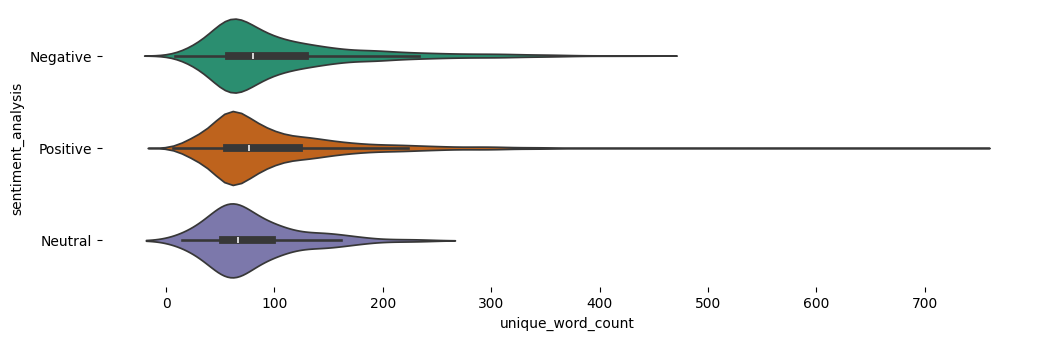

In [ ]:
# @title sentiment_analysis vs unique_word_count

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['sentiment_analysis'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='unique_word_count', y='sentiment_analysis', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

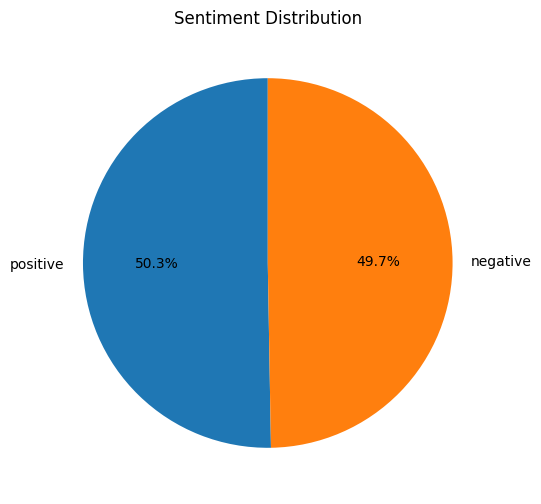

In [ ]:
# @title Sentiment Distribution

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sentiment_counts = df1['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Sentiment Distribution')

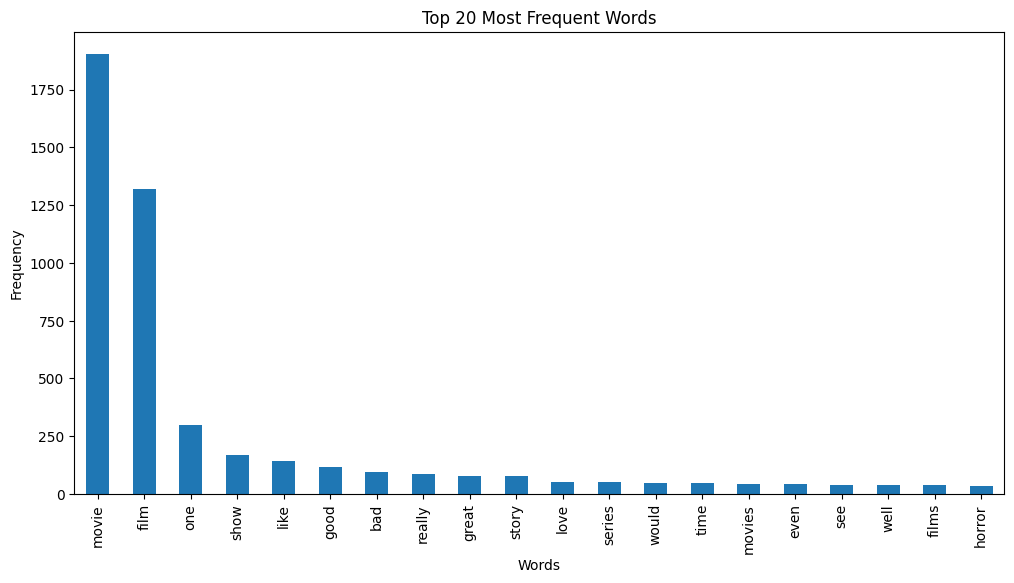

In [ ]:
# @title Top 20 Most Frequent Words

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

df1['most_frequent_word'].value_counts().nlargest(20).plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
_ = plt.title('Top 20 Most Frequent Words')


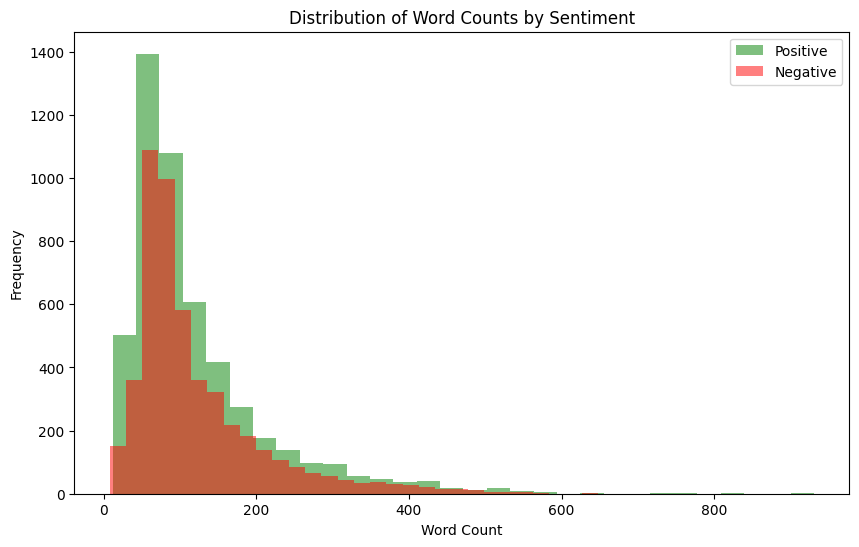

In [ ]:
# @title Distribution of Word Counts by Sentiment

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df1[df1['sentiment'] == 'positive']['word_count'], bins=30, alpha=0.5, label='Positive', color='green')
plt.hist(df1[df1['sentiment'] == 'negative']['word_count'], bins=30, alpha=0.5, label='Negative', color='red')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts by Sentiment')
_ = plt.legend()

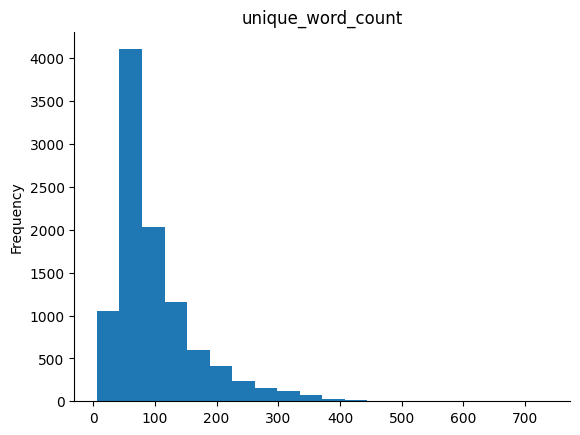

In [ ]:
# @title unique_word_count

from matplotlib import pyplot as plt
df1['unique_word_count'].plot(kind='hist', bins=20, title='unique_word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

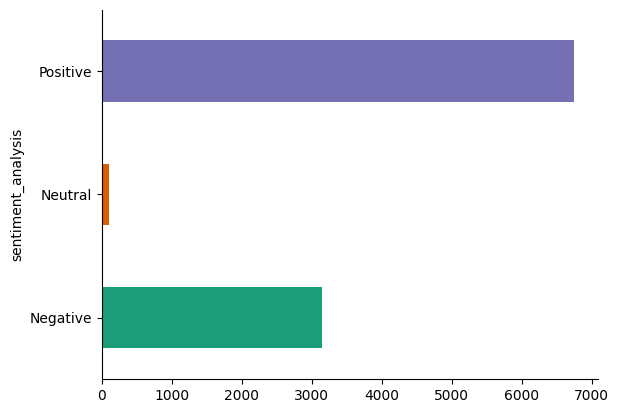

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('sentiment_analysis').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)